# Домашнее задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import gdown
import pandas as pd

## Данные

Задания 1,2 выполните для сети:

In [2]:
!gdown --id 1OKwRSPXs212Mzttg4D0GFFkiap-GztP_

/opt/anaconda3/envs/hwenv/lib/python3.13/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OKwRSPXs212Mzttg4D0GFFkiap-GztP_
To: /Users/v.makshanchikov/Documents/Python Proj/Вальба ДЗ 1/Wiki-Vote.txt
100%|██████████████████████████████████████| 1.10M/1.10M [00:00<00:00, 4.26MB/s]


In [3]:
G=nx.read_edgelist('Wiki-Vote.txt',create_using=nx.DiGraph())
print('Nodes:',G.number_of_nodes()) # и выводим основные свойства
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))
print('Reciprocity:', nx.reciprocity(G))

Nodes: 7115
Edges: 103689
Density: 0.0020485375110809584
Reciprocity: 0.0564572905515532


## 1. Структурно-сетевые свойства направленной сети

### 1)  Распределение степеней (2 балла)
Постройте распределение степеней (in, out). Какой статистике подчиняются распределения?

### 2)  Ассортативность (1 балл)
Вычислите ассортативность, результат представьте в ввиде матрицы, всего 4 значения для разных комбинаций in/out степеней.

### 3)  Связность (1 балл)
Является ли сеть сильно/слабо связанной? Постройте распределение размеров сильно связанных компонент. Сколько вершин входит в компоненту наибольшего размера?

### 4) Кратчайшие пути (1 балл)

Определите среднюю длину кратчайшего пути в наибольшей сильно связной компоненте.

### 1)  Распределение степеней

In [4]:
in_degrees = np.array([d for _, d in G.in_degree()])
out_degrees = np.array([d for _, d in G.out_degree()])

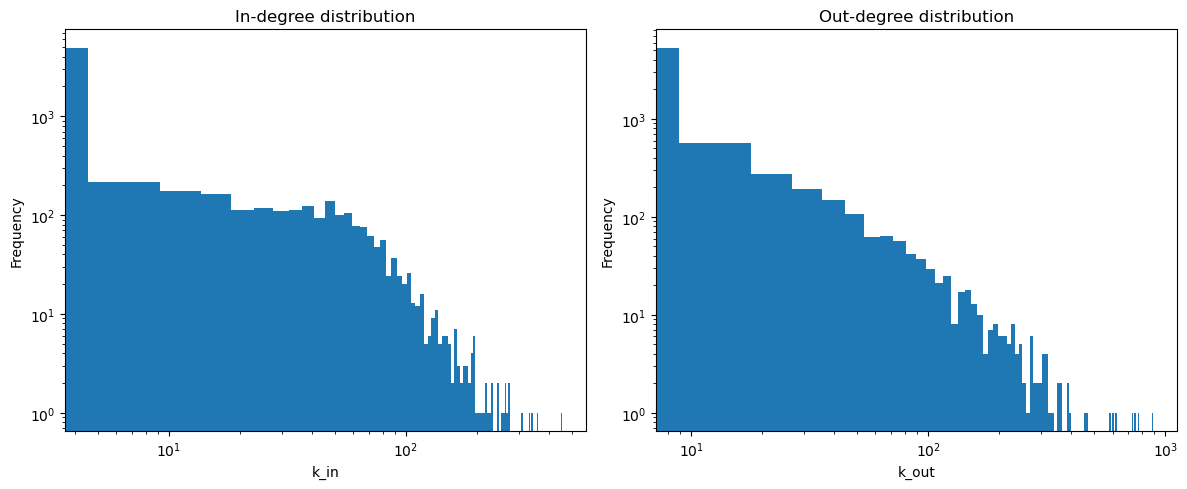

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(in_degrees, bins=100, log=True)
plt.yscale('log')
plt.xscale('log')
plt.title('In-degree distribution')
plt.xlabel('k_in')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(out_degrees, bins=100, log=True)
plt.yscale('log')
plt.xscale('log')
plt.title('Out-degree distribution')
plt.xlabel('k_out')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Оба распределения имеют длинный правый хвост
- В log–log масштабе хвосты близки к линейным
- Большинство вершин имеет малую степень, но присутствуют хабы

In [6]:
print("Max in-degree:", in_degrees.max())
print("Max out-degree:", out_degrees.max())

Max in-degree: 457
Max out-degree: 893


### Вывод
Распределения входящих и исходящих степеней вершин обладают тяжёлыми хвостами и близки к степенному распределению (power-law). Это характерно для масштабно-инвариантных (scale-free) социальных и информационных сетей.
Наличие вершин с крайне высокой исходящей и входящей степенью указывает на существование хабов (активных и авторитетных участников).

### 2)  Ассортативность

In [7]:
r_in_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
r_in_out = nx.degree_assortativity_coefficient(G, x='in', y='out')
r_out_in = nx.degree_assortativity_coefficient(G, x='out', y='in')
r_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')

assortativity_matrix = np.array([
    [r_in_in, r_in_out],
    [r_out_in, r_out_out]
])

assortativity_matrix

array([[ 0.00509101,  0.0070958 ],
       [-0.08324456, -0.01890915]])

- r(in,in) и r(in,out) — близки к нулю → практически отсутствует корреляция
- r(out,in) — заметно отрицательная
- r(out,out) — слабая отрицательная

### Вывод
Сеть в целом является дисассортативной по степени, особенно по комбинации out–in. Это означает, что вершины с высокой исходящей степенью чаще соединяются с вершинами с низкой входящей степенью.
Такое поведение типично для ориентированных социальных сетей, где активные участники (много голосуют) направляют связи на менее популярных или новых пользователей.

### 3)  Связность 

In [8]:
print("Is strongly connected:", nx.is_strongly_connected(G))
print("Is weakly connected:", nx.is_weakly_connected(G))

Is strongly connected: False
Is weakly connected: False


Сеть не является ни сильно, ни слабо связной. Это означает, что в графе присутствуют изолированные подграфы и вершины, не соединённые даже при игнорировании направлений рёбер.
Подобная структура типична для реальных социальных сетей с неполным участием пользователей.

In [9]:
sccs = list(nx.strongly_connected_components(G))
scc_sizes = np.array([len(c) for c in sccs])

print("Number of SCCs:", len(scc_sizes))
print("Largest SCC size:", scc_sizes.max())

Number of SCCs: 5816
Largest SCC size: 1300


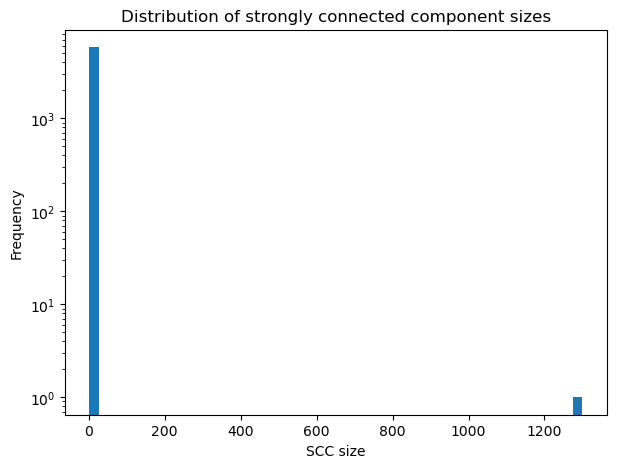

In [10]:
plt.figure(figsize=(7,5))
plt.hist(scc_sizes, bins=50, log=True)
plt.yscale('log')
plt.xlabel('SCC size')
plt.ylabel('Frequency')
plt.title('Distribution of strongly connected component sizes')
plt.show()

- Подавляющее большинство SCC имеют размер 1
- Присутствует одна доминирующая сильно связная компонента
- Остальные компоненты — очень малые

### Вывод
Структура сети характеризуется наличием одной крупной сильно связной компоненты и большого числа малых компонент, включая одиночные вершины.
Это указывает на существование ядра сети с интенсивным взаимным взаимодействием и периферии из слабо вовлечённых пользователей.

### 4) Кратчайшие пути

In [11]:
largest_scc = max(sccs, key=len)
G_scc = G.subgraph(largest_scc).copy()

G_scc.number_of_nodes(), G_scc.number_of_edges()


(1300, 39456)

In [12]:
avg_path_length = nx.average_shortest_path_length(G_scc)
avg_path_length

2.8792828803221413

### Вывод
Средняя длина кратчайшего пути в крупнейшей сильно связной компоненте мала и составляет менее 3 шагов. Это свидетельствует о наличии эффекта «малого мира» (small-world), характерного для социальных сетей, где большинство пользователей достижимы друг от друга за несколько переходов.

## 2. Центральности и прогнозирование динамической влиятельности в направленной сети

 ### 1)  Классы (1 балл)
 Разделите вершины на два класса по значению spreading ability: "хорошо " распространяют эпидемию и "плохо".

### 2)  AUC-ROC (2 балла)
Для выбранных метрик центральности (2-3 разные меры) постройте AUC-ROC кривую и вычислите соответсвующую площадь.

### 3) Гибридная центральность (3 балла)
Для  гибридной центральности  постройте зависимость площади под AUC-ROC кривой от параметра  σ . Каков оптимальный параметр гибридной центральности?

In [13]:
!gdown --id 1JziO7FuzyDWeUOGUNusHSPdppFodJ670

/opt/anaconda3/envs/hwenv/lib/python3.13/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JziO7FuzyDWeUOGUNusHSPdppFodJ670
To: /Users/v.makshanchikov/Documents/Python Proj/Вальба ДЗ 1/spreading_data_wiki-Vote.csv
100%|████████████████████████████████████████| 187k/187k [00:00<00:00, 1.51MB/s]


In [14]:
df=pd.read_csv('spreading_data_wiki-Vote.csv')
df.head()

,node,spreading ability
0,30,0.277864
1,1412,0.000141
2,3352,0.280253
3,5254,0.278426
4,5543,0.274209


array([[<Axes: title={'center': 'spreading ability'}>]], dtype=object)

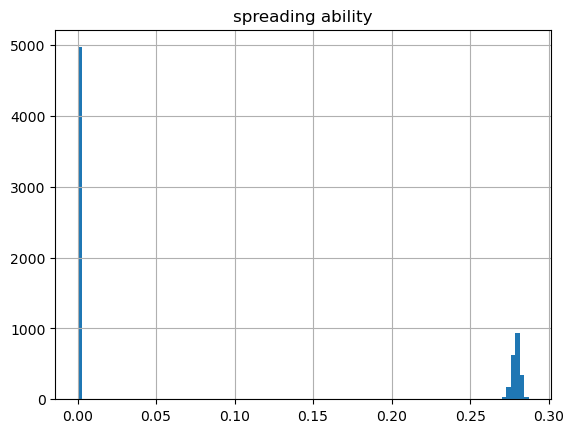

In [15]:
df.hist('spreading ability', bins=100)

### 1) Классы

In [16]:
threshold = df['spreading ability'].quantile(0.9)
threshold

np.float64(0.2803935347856641)

In [17]:
df['label'] = (df['spreading ability'] >= threshold).astype(int)
df['label'].value_counts()

label
0    6380
1     735
Name: count, dtype: int64

Вершины были разделены на два класса на основе 90-го перцентиля spreading ability. В класс «хорошо распространяющих» вошли вершины с наибольшей способностью инициировать эпидемическое распространение.

### 2)  AUC-ROC

In [18]:
deg_cent = nx.degree_centrality(G)
pagerank = nx.pagerank(G, alpha=0.85)
betweenness = nx.betweenness_centrality(G, normalized=True)

In [19]:
df['node'] = df['node'].astype(str)

df['deg_cent'] = df['node'].map(deg_cent)
df['pagerank'] = df['node'].map(pagerank)
df['betweenness'] = df['node'].map(betweenness)

df[['deg_cent', 'pagerank', 'betweenness']].isna().sum()

deg_cent       0
pagerank       0
betweenness    0
dtype: int64

Все значения смэтчились, нет пропущенных

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
y_true = df['label']

auc_deg = roc_auc_score(y_true, df['deg_cent'])
auc_pr = roc_auc_score(y_true, df['pagerank'])
auc_bw = roc_auc_score(y_true, df['betweenness'])

auc_deg, auc_pr, auc_bw

(0.7453599684387862, 0.5585760134774914, 0.629679802955665)

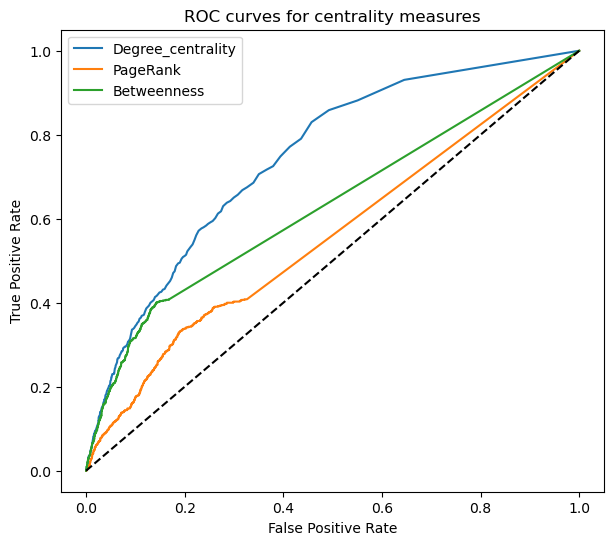

In [22]:
plt.figure(figsize=(7,6))

for name, scores in {
    'Degree_centrality': df['deg_cent'],
    'PageRank': df['pagerank'],
    'Betweenness': df['betweenness']
}.items():
    fpr, tpr, _ = roc_curve(y_true, scores)
    plt.plot(fpr, tpr, label=f'{name}')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for centrality measures')
plt.legend()
plt.show()

При сопоставлении метрик центральности с вершинами была выявлена необходимость согласования типов идентификаторов узлов. После приведения идентификаторов к единому формату (string) значения центральностей были корректно сопоставлены, что позволило вычислить ROC-AUC без пропусков данных. Лучшей оказалась мера Degree_centrality

### 3) Гибридная центральность

In [23]:
n = G.number_of_nodes()

in_cent = {v: d / (n - 1) for v, d in G.in_degree()}
out_cent = {v: d / (n - 1) for v, d in G.out_degree()}

df['in_cent'] = df['node'].map(in_cent)
df['out_cent'] = df['node'].map(out_cent)

df[['in_cent', 'out_cent']].isna().sum()

in_cent     0
out_cent    0
dtype: int64

In [24]:
auc_in = roc_auc_score(y_true, df['in_cent'])
auc_out = roc_auc_score(y_true, df['out_cent'])

auc_in, auc_out

(0.5630518414262258, 0.8238761648860171)

Исходящая центральность демонстрирует высокую предсказательную способность (AUC ≈ 0.82), существенно превосходя входящую центральность. Это указывает на ключевую роль активности вершины в распространении эпидемии.

In [25]:
eps = 1e-12
sigmas = np.linspace(0.01, 0.99, 100)

auc_scores = []

for sigma in sigmas:
    hybrid = (
        (df['in_cent'] + eps) ** sigma
        * (df['out_cent'] + eps) ** (1 - sigma)
    )
    auc_scores.append(roc_auc_score(y_true, hybrid))


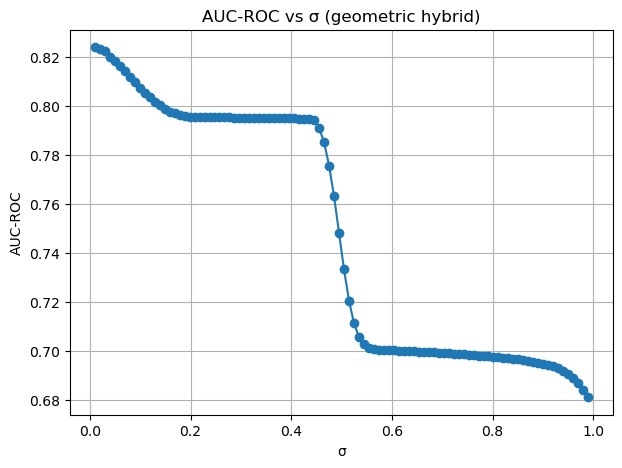

In [26]:
plt.figure(figsize=(7,5))
plt.plot(sigmas, auc_scores, marker='o')
plt.xlabel('σ')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC vs σ (geometric hybrid)')
plt.grid(True)
plt.show()

In [27]:
best_sigma = sigmas[np.argmax(auc_scores)]
best_auc = max(auc_scores)

best_sigma, best_auc

(np.float64(0.01), 0.8238649691851662)

Для построения гибридной центральности использовалась мультипликативная модель, представляющая собой обобщённое геометрическое среднее входящей и исходящей центральностей. Для корректной обработки вершин с нулевыми степенями была введена малая регуляризующая константа ε. Оптимальное значение параметра σ было определено по максимуму площади под ROC-кривой.

Для геометрической гибридной центральности максимум площади под ROC-кривой достигается при σ ≈ 0. Это означает, что вклад входящей центральности в оценку эпидемического потенциала минимален, а решающую роль играет исходящая связность вершины.

## 3. Моделирование направленной сети с заданным значением взаимности (доли двунаправленных связей)

### 1) Генератор (3 балла)
Напишите генератор случайного направленного графа Эрдеша-Реньи с заданной вероятностью связи $p$ и долей двунаправленных связей $r$.

 ### 2) Пример сети (1 балла)
  Для нескольких выбранных пар $(p,r)$ постройте распределение степеней, вычислите транзитивность.

 ### 3) Зависимость от $r$ (3 балла)
  Пусть $p =const$, а параметр $r$ меняется в интервале $[0,1]$. Постройте зависимость транзитивности (или средний путь) сети от параметра $r$. Объясните результаты

### 1) Генератор

In [28]:
import random

def directed_er_with_reciprocity(n, p, r, seed=None):
    if seed is not None:
        random.seed(seed)

    G = nx.DiGraph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                if random.random() < r:
                    G.add_edge(i, j)
                    G.add_edge(j, i)
                else:
                    if random.random() < 0.5:
                        G.add_edge(i, j)
                    else:
                        G.add_edge(j, i)
    return G

 ### 2) Пример сети

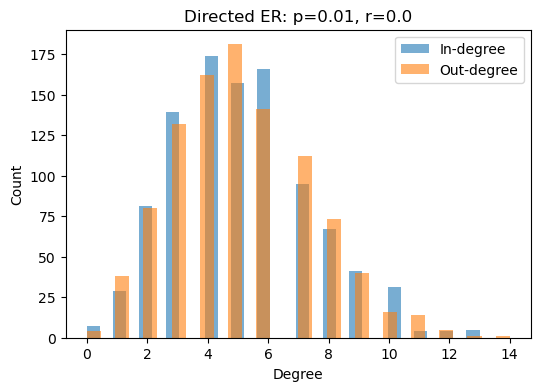

In [29]:
G = directed_er_with_reciprocity(n=1000, p=0.01, r=0.0, seed=74)

in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

plt.figure(figsize=(6,4))
plt.hist(in_degrees, bins=30, alpha=0.6, label='In-degree')
plt.hist(out_degrees, bins=30, alpha=0.6, label='Out-degree')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Directed ER: p=0.01, r=0.0")
plt.show()

In [30]:
nx.transitivity(G)

0.005000757690559176

- In- и out-degree распределения очень похожи
- Максимумы могут отличаться случайно
- Низкая транзитивность

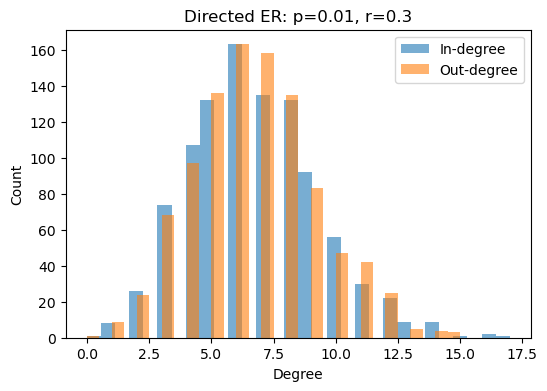

In [31]:
G = directed_er_with_reciprocity(n=1000, p=0.01, r=0.3, seed=74)

in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

plt.figure(figsize=(6,4))
plt.hist(in_degrees, bins=30, alpha=0.6, label='In-degree')
plt.hist(out_degrees, bins=30, alpha=0.6, label='Out-degree')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Directed ER: p=0.01, r=0.3")
plt.show()

In [32]:
nx.transitivity(G)

0.005973907072556649

Транзитивность растет

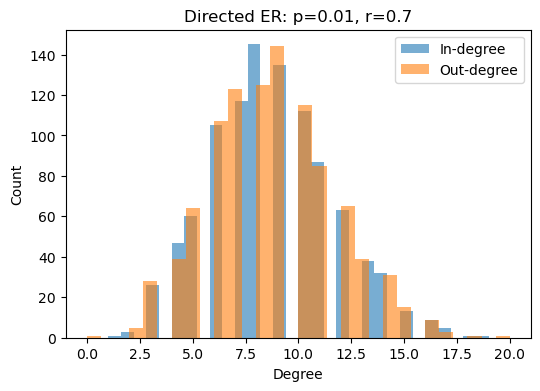

In [33]:
G = directed_er_with_reciprocity(n=1000, p=0.01, r=0.7, seed=74)

in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

plt.figure(figsize=(6,4))
plt.hist(in_degrees, bins=30, alpha=0.6, label='In-degree')
plt.hist(out_degrees, bins=30, alpha=0.6, label='Out-degree')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Directed ER: p=0.01, r=0.7")
plt.show()

In [34]:
nx.transitivity(G)

0.008766512726882182

Транзитивность максимальная для наборов

При фиксированной вероятности связи увеличение доли взаимных рёбер приводит к росту корреляции между входящими и исходящими степенями вершин. В пределе при r = 1 направленная сеть эквивалентна неориентированной модели Эрдеша–Реньи.

 ### 3) Зависимость от $r$

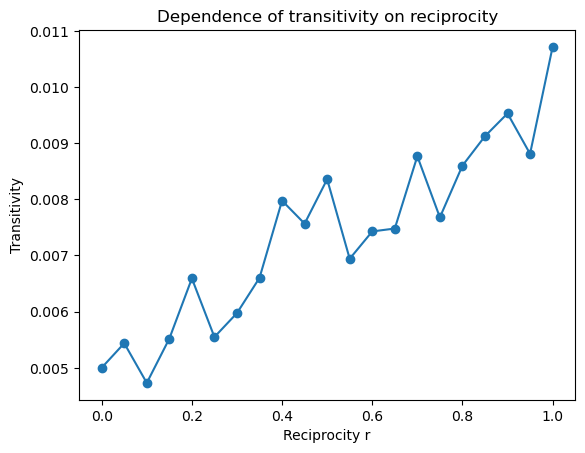

In [35]:
n = 1000
p = 0.01
r_values = np.linspace(0, 1, 21)

transitivity_values = []

for r in r_values:
    G = directed_er_with_reciprocity(n, p, r, 74)
    transitivity_values.append(nx.transitivity(G))

plt.plot(r_values, transitivity_values, marker='o')
plt.xlabel("Reciprocity r")
plt.ylabel("Transitivity")
plt.title("Dependence of transitivity on reciprocity")
plt.show()

Увеличение параметра взаимности в целом приводит к росту транзитивности сети, что связано с увеличением числа замкнутых триад за счёт двунаправленных связей.

При r→1 направленная сеть по своим свойствам приближается к неориентированной модели Эрдеша–Реньи.